# PPO Algorithm

This code performs PPO on the Patrolling Zoo environment.

In [4]:
%reload_ext autoreload
%autoreload 2

import torch
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from algorithm.ppo_bitmap import PPO

# set process priority low
import psutil
import os
if os.name == 'nt':
    psutil.Process(os.getpid()).nice(psutil.BELOW_NORMAL_PRIORITY_CLASS)
else:
    psutil.Process(os.getpid()).nice(10)

# Configuration

In [5]:
MAX_CYCLES = 50

""" ENV SETUP """
patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 6,
    require_explicit_visit = True,
    speed = 5,
    alpha = 10,
    max_cycles = MAX_CYCLES,
    observe_method = "bitmap"
)

"""ALGO PARAMS"""
algo = PPO(
    env = env,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    ent_coef = 0.1,
    vf_coef = 0.1,
    clip_coef = 0.1,
    gamma = 0.99,
    lr = 1e-4,
    stack_size = 4,
    batch_size = 1,
    frame_size = (len(parallel_env.OBSERVATION_CHANNELS), env.pg.widthPixels, env.pg.heightPixels),
    max_cycles = MAX_CYCLES,
    total_episodes = 20
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(688, 499, 3)


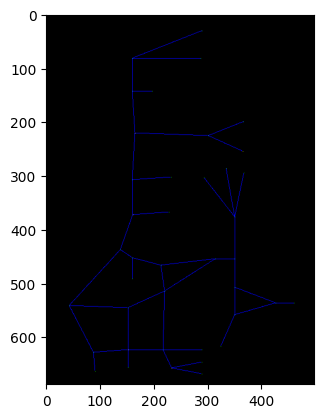

In [6]:
# Use matplotlib to visualize the observation. The observation is a bitmap of the environment.
env.reset()
env.step([0, 0])
obs = env.state()
print(obs.shape)

# print(obs)
import matplotlib.pyplot as plt
plt.imshow(obs)

In [27]:
# raise Exception("Stop here")

# Training

In [29]:
stats = algo.train(seed=42)

obs.shape (100, 100, 3)


RuntimeError: The expanded size of the tensor (1) must match the existing size (128) at non-singleton dimension 0.  Target sizes: [1].  Tensor sizes: [128]

In [ ]:
algo.save()

NameError: name 'stats' is not defined

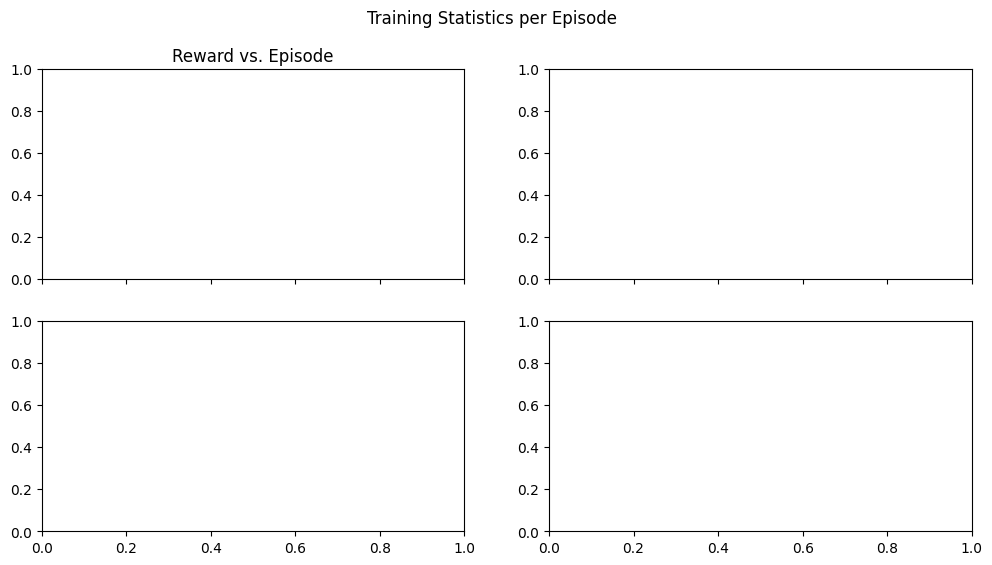

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(12, 6))
fig.suptitle("Training Statistics per Episode")

ax[0, 0].set_title("Reward vs. Episode")
ax[0, 0].plot(stats["episodic_return"])

ax[1, 0].set_title("Iterations vs. Episode")
ax[1, 0].plot(stats["episodic_length"])

plt.show()


fig, ax = plt.subplots(4, 2, sharex=True, figsize=(12, 10))
fig.suptitle("Training Statistics per Iteration")

ax[0, 1].set_title("Value Loss vs. Iteration")
ax[0, 1].plot(stats["value_loss"], label="value_loss")
# ax[0, 1].legend()

ax[1, 0].set_title("Policy Loss vs. Iteration")
ax[1, 0].plot(stats["policy_loss"], label="policy_loss")
# ax[1, 0].legend()

ax[1, 1].set_title("Entropy Loss vs. Iteration")
ax[1, 1].plot(stats["entropy_loss"], label="entropy_loss")
# ax[1, 1].legend()

ax[2, 0].set_title("Total Loss vs. Iteration")
ax[2, 0].plot(stats["total_loss"], label="total_loss")
# ax[2, 0].legend()

ax[2, 1].set_title("Approx. KL-Divergence vs. Iteration")
ax[2, 1].plot(stats["approx_kl"])

ax[3, 0].set_title("Clip Fraction vs. Iteration")
ax[3, 0].plot(stats["clip_frac"])

plt.show()


# Evaluation

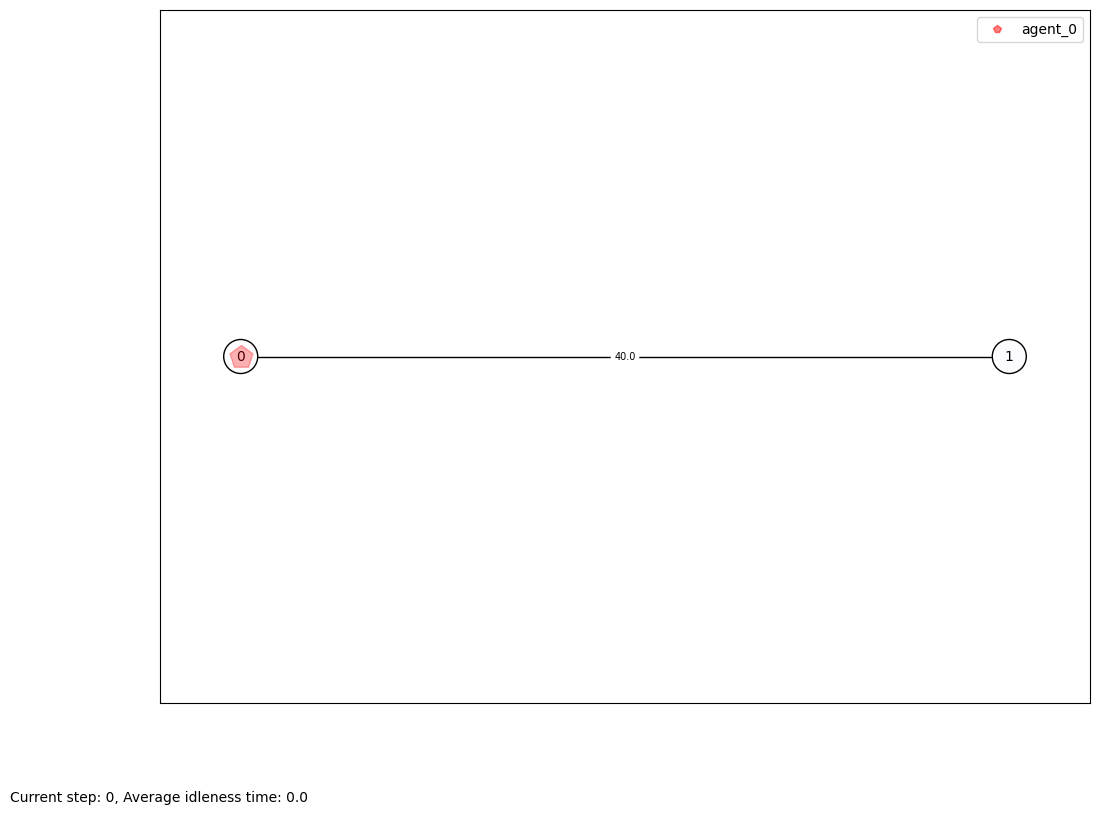

obs.shape (1, 100, 50, 3)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x9216 and 8192x512)

In [ ]:
algo.evaluate(render=True, max_cycles=100, seed=42)